<a href="https://colab.research.google.com/github/vipinUTA/Projects/blob/master/Project_CNN_VIPIN_CHOUDHARY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project - – Image classification using CNNs in Keras

 
### You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.


### Objective:
To implement the techniques learnt as a part of the course. 
### Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

### Learning OUtcome:
Pre-processing of image data.
Visualization of images.
Building CNN.
Evaluate the Model.
The motive of the project is to make the learners capable to handle images/image classification problems, during this
process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


Import the libraries, load dataset, print shape of data, visualize the images in dataset

In [54]:
# Import necessary modules.

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image,HTML

import matplotlib.image as mpimg

from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten,GlobalMaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import cv2
import pandas as pd

In [280]:
file_path = '/content/drive/My Drive/Colab Notebooks/computer_vision/images.npy'

In [281]:
image=np.load(file_path)

In [282]:
image.shape

(4750, 128, 128, 3)

In [283]:
labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/computer_vision/Labels.csv")

Preprocessing

In [339]:
labels.shape

(4750, 1)

In [285]:
print(image[0])

[[[ 35  52  78]
  [ 36  49  76]
  [ 31  45  69]
  ...
  [ 78  95 114]
  [ 76  93 110]
  [ 80  95 109]]

 [[ 33  46  68]
  [ 37  50  73]
  [ 48  65  83]
  ...
  [ 81  96 113]
  [ 74  89 105]
  [ 83  95 109]]

 [[ 34  50  68]
  [ 35  52  72]
  [ 70  85 101]
  ...
  [ 83  97 112]
  [ 79  94 108]
  [ 79  94 107]]

 ...

 [[ 35  50  69]
  [ 42  57  73]
  [ 42  57  72]
  ...
  [ 60  76  92]
  [ 67  81  97]
  [ 64  77  95]]

 [[ 36  52  67]
  [ 48  63  78]
  [ 41  57  73]
  ...
  [ 44  66  83]
  [ 58  76  91]
  [ 57  74  90]]

 [[ 44  58  70]
  [ 43  57  73]
  [ 40  55  72]
  ...
  [ 41  70  92]
  [ 55  78  97]
  [ 61  79  96]]]


In [286]:
print(image.shape)

(4750, 128, 128, 3)


In [287]:
labels['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

In [288]:
labels.head

<bound method NDFrame.head of                           Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]>

In [100]:
label = labels.to_numpy()

HOT Encoding

In [289]:
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
lab = label_encoder.fit_transform(label)

print(lab)

[10 10 10 ...  6  6  6]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [290]:
y = np.bincount(lab)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T

array([[  0, 263],
       [  1, 390],
       [  2, 287],
       [  3, 611],
       [  4, 221],
       [  5, 475],
       [  6, 654],
       [  7, 221],
       [  8, 516],
       [  9, 231],
       [ 10, 496],
       [ 11, 385]])

In [291]:
lab.shape

(4750,)

In [292]:
for i in range(11):
    print(label[i])

['Small-flowered Cranesbill']
['Small-flowered Cranesbill']
['Small-flowered Cranesbill']
['Small-flowered Cranesbill']
['Small-flowered Cranesbill']
['Small-flowered Cranesbill']
['Small-flowered Cranesbill']
['Small-flowered Cranesbill']
['Small-flowered Cranesbill']
['Small-flowered Cranesbill']
['Small-flowered Cranesbill']


Visualize data after pre-processing.


In [293]:
import cv2
from google.colab.patches import cv2_imshow

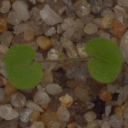

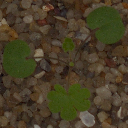

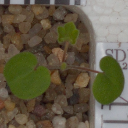

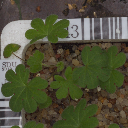

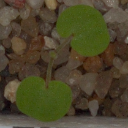

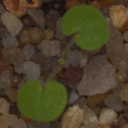

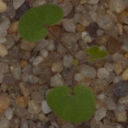

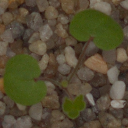

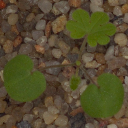

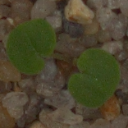

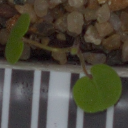

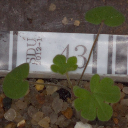

In [343]:
for i in range(12):
  cv2_imshow(image[i])

Gray Image


Original Image:


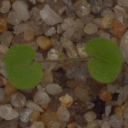

Output after grayscale conversion:


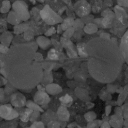

In [295]:
# Convert image to grayscale. The second argument in the following step is cv2.COLOR_BGR2GRAY, which converts colour image to grayscale.
gray = cv2.cvtColor(image[0], cv2.COLOR_BGR2GRAY)
print("Original Image:")
cv2_imshow(image[0])
print("Output after grayscale conversion:")
cv2_imshow(gray)

Gaussian Blurring

Original Image:



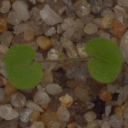


 Output after first gaussian blurring: 



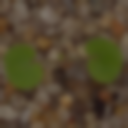


 Output after second gaussian blurring: 



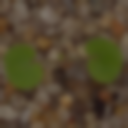

In [296]:
Gaussian1 = cv2.GaussianBlur(image[0], (5, 5), 0)
Gaussian2 = cv2.GaussianBlur(image[0], (15, 15), 0)
print('Original Image:\n')
cv2_imshow(image[0])
print('\n Output after first gaussian blurring: \n')
cv2_imshow(Gaussian2)
print('\n Output after second gaussian blurring: \n')
cv2_imshow(Gaussian2)

In [ ]:
Splitting 

In [317]:
# The data, split between train and test sets:
x_train, x_test, y_train, y_test = train_test_split(image, lab, test_size=.3)
x_test1, x_valid, y_test1, y_valid = train_test_split(x_test, y_test, test_size=0.5, shuffle= True)

In [333]:
# Print the shape of dataset.
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print('x_test1 shape:', x_test1.shape)
print('y_test1 shape:', y_test1.shape)
print('x_valid shape:', x_valid.shape)
print('y_valid shape:', y_valid.shape)

x_train shape: (3325, 128, 128, 3)
y_train shape: (3325, 12)
x_test shape: (1425, 128, 128, 3)
y_test shape: (1425,)
x_test1 shape: (712, 128, 128, 3)
y_test1 shape: (712, 12)
x_valid shape: (713, 128, 128, 3)
y_valid shape: (713, 12)


In [310]:
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test1 = x_test1.reshape(x_test1.shape[0], 128, 128, 3)
x_valid = x_valid.reshape(x_valid.shape[0], 128, 128, 3)

In [319]:
x_train = x_train.astype('float32')
x_test1 = x_test1.astype('float32')
x_valid = x_valid.astype('float32')

x_train /= 255
x_test1 /= 255
x_valid /= 255

In [257]:
print("x_train shape:", x_train.shape)
print("Images in x_train:", x_train.shape[0])
print("Images in x_test:", x_test.shape[0])
print("Max value in x_train:", x_train.max())
print("Min value in y_train:", y_train.min())
print("Max value in x_valid:", x_valid.max())
print("Min value in y_valid:", y_valid.min())
print("Max value in x_test1:", x_test1.max())
print("Min value in y_test1:", y_test1.min())


x_train shape: (3325, 128, 128, 3)
Images in x_train: 3325
Images in x_test: 1425
Max value in x_train: 1.0
Min value in y_train: 0.0
Max value in x_valid: 1.0
Min value in y_valid: 0.0
Max value in x_test1: 1.0
Min value in y_test1: 0.0


In [321]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=12)
y_test1 = to_categorical(y_test1, num_classes=12)
y_valid = to_categorical(y_valid, num_classes=12)
print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (3325, 12)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [316]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [227]:
from tensorflow.keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
flatten_3 (Flatten)          (None, 492032)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               62980224  
_________________________________________________________________
dense_15 (Dense)             (None, 12)                1548      
Total params: 62,991,916
Trainable params: 62,991,916
Non-trainable params: 0
_________________________________________________________________


In [229]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model.fit( x=x_train, y=y_train, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
104/104 [==============================] - 175s 2s/step - loss: 5.4416 - accuracy: 0.2222 - val_loss: 1.5167 - val_accuracy: 0.4867
Epoch 2/10
104/104 [==============================] - 173s 2s/step - loss: 1.3113 - accuracy: 0.5550 - val_loss: 1.2091 - val_accuracy: 0.5933
Epoch 3/10
104/104 [==============================] - 172s 2s/step - loss: 0.9380 - accuracy: 0.6819 - val_loss: 1.0807 - val_accuracy: 0.6466
Epoch 4/10
104/104 [==============================] - 172s 2s/step - loss: 0.5940 - accuracy: 0.8039 - val_loss: 1.1862 - val_accuracy: 0.6143
Epoch 5/10
104/104 [==============================] - 172s 2s/step - loss: 0.3762 - accuracy: 0.8872 - val_loss: 1.3162 - val_accuracy: 0.6297
Epoch 6/10
104/104 [==============================] - 172s 2s/step - loss: 0.1828 - accuracy: 0.9537 - val_loss: 1.5710 - val_accuracy: 0.6017
Epoch 7/10
104/104 [==============================] - 172s 2s/step - loss: 0.0959 - accuracy: 0.9745 - val_loss: 1.8449 - val_accuracy: 0.6017

In [323]:
scores = model.evaluate(x_test1, y_test1, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 7s 311ms/step - loss: 0.6993 - accuracy: 0.8834
Test loss: 0.6992841362953186
Test accuracy: 0.8834269642829895


Predicted label: 10
Softmax Outputs: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1.0


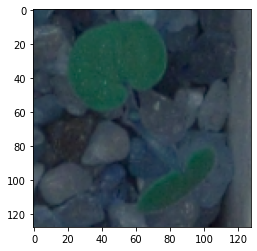

In [325]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[2].reshape(128, 128, 3))
y_pred = model.predict(x_test[2].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 1
Softmax Outputs: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0


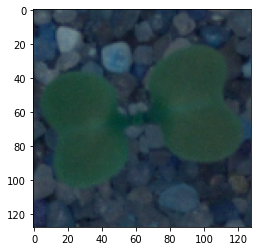

In [326]:
plt.imshow(x_test[3].reshape(128, 128, 3))
y_pred = model.predict(x_test[3].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 8
Softmax Outputs: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
1.0


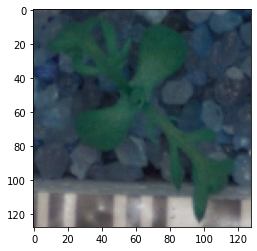

In [327]:
plt.imshow(x_test[33].reshape(128, 128, 3))
y_pred = model.predict(x_test[33].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 3
Softmax Outputs: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0


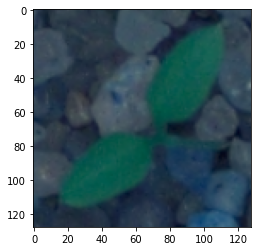

In [328]:
plt.imshow(x_test[36].reshape(128, 128, 3))
y_pred = model.predict(x_test[36].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 2
Softmax Outputs: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0


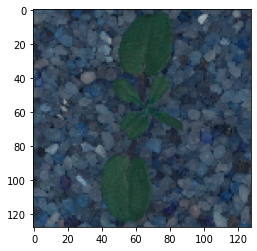

In [329]:
plt.imshow(x_test[59].reshape(128, 128, 3))
y_pred = model.predict(x_test[59].reshape(1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

In [332]:
print('x_train shape:', y_test1.shape)
print('y_train shape:', y_pred.shape)

x_train shape: (712, 12)
y_train shape: (1, 12)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

import sklearn.metrics as metrics
from keras.wrappers.scikit_learn import KerasClassifier
y_pred_ohe = model.predict(x_test1)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)  # shape=(12, 12)